<a href="https://colab.research.google.com/github/vigneshsharma1997/Insurance_Decisioning/blob/main/Copy_of_Insurance_Decisioing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
url = 'https://raw.githubusercontent.com/vigneshsharma1997/Insurance_Decisioning/main/train%20(1).csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble

In [ ]:
insurance_df = pd.read_csv(url,index_col = "Id")

In [ ]:
insurance_df.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
Id,,,,,,,,,,,,,,,,,,,,,
2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,0,0,8
5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0,0,0,0,0,0,0,0,0,4
6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,8
7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,0,0,0,8
8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,0,0,0,0,0,0,0,0,8


In [ ]:
insurance_df.shape

(59381, 127)

## Exploring the dependent variable

In [ ]:
insurance_df['Response'].value_counts()

8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: Response, dtype: int64

In [ ]:
insurance_df['Response'].isnull().sum()

0

<Axes: xlabel='Response', ylabel='count'>

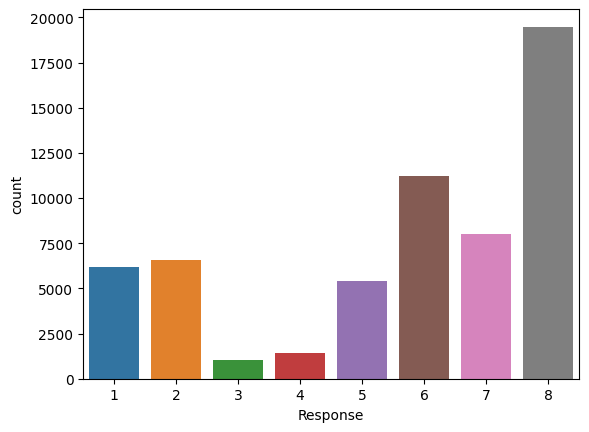

In [ ]:
sns.countplot(x=insurance_df.Response)

## Converting the dependent variable to a binary variable (two possible labels/classes)

In [ ]:
def modified_response(series):
  if((series['Response']<=7) & (series['Response'] >= 0)):
    val = 0
  elif (series['Response']==8):
    val = 1
  else:
    val = -1

  return val

In [ ]:
insurance_df['Modified_Response'] = insurance_df.apply(modified_response,axis=1)

In [ ]:
insurance_df['Modified_Response'].value_counts()

0    39892
1    19489
Name: Modified_Response, dtype: int64

<Axes: xlabel='Modified_Response', ylabel='count'>

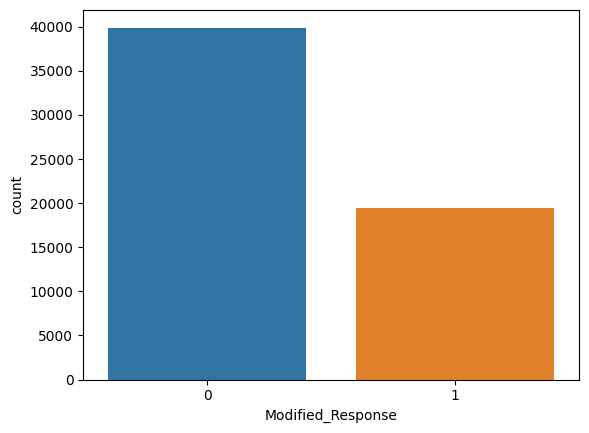

In [ ]:
sns.countplot(x=insurance_df['Modified_Response'])

In [ ]:
insurance_df.drop('Response',axis=1,inplace=True)

In [ ]:
insurance_df.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Modified_Response
Id,,,,,,,,,,,,,,,,,,,,,
2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,0,0,1
5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0,0,0,0,0,0,0,0,0,0
6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,1
7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,0,0,0,1
8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
insurance_df.describe()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Modified_Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,0.469462,...,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,0.328203
std,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,0.122213,...,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,0.469563
min,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,0.385517,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,0.451349,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,0.532858,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

## Dropping the columns with more than 40% null values

In [ ]:
na_count = insurance_df.isnull().sum()/len(insurance_df)
print(na_count[na_count > 0.4].sort_values(ascending=False))

Medical_History_10     0.990620
Medical_History_32     0.981358
Medical_History_24     0.935990
Medical_History_15     0.751015
Family_Hist_5          0.704114
Family_Hist_3          0.576632
Family_Hist_2          0.482579
Insurance_History_5    0.427679
dtype: float64


In [ ]:
insurance_df = insurance_df.dropna(thresh=insurance_df.shape[0]*0.4,axis=1)

In [ ]:
list(insurance_df.columns)

['Product_Info_1',
 'Product_Info_2',
 'Product_Info_3',
 'Product_Info_4',
 'Product_Info_5',
 'Product_Info_6',
 'Product_Info_7',
 'Ins_Age',
 'Ht',
 'Wt',
 'BMI',
 'Employment_Info_1',
 'Employment_Info_2',
 'Employment_Info_3',
 'Employment_Info_4',
 'Employment_Info_5',
 'Employment_Info_6',
 'InsuredInfo_1',
 'InsuredInfo_2',
 'InsuredInfo_3',
 'InsuredInfo_4',
 'InsuredInfo_5',
 'InsuredInfo_6',
 'InsuredInfo_7',
 'Insurance_History_1',
 'Insurance_History_2',
 'Insurance_History_3',
 'Insurance_History_4',
 'Insurance_History_5',
 'Insurance_History_7',
 'Insurance_History_8',
 'Insurance_History_9',
 'Family_Hist_1',
 'Family_Hist_2',
 'Family_Hist_3',
 'Family_Hist_4',
 'Medical_History_1',
 'Medical_History_2',
 'Medical_History_3',
 'Medical_History_4',
 'Medical_History_5',
 'Medical_History_6',
 'Medical_History_7',
 'Medical_History_8',
 'Medical_History_9',
 'Medical_History_11',
 'Medical_History_12',
 'Medical_History_13',
 'Medical_History_14',
 'Medical_History_16'

In [ ]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59381 entries, 2 to 79146
Columns: 122 entries, Product_Info_1 to Modified_Response
dtypes: float64(13), int64(108), object(1)
memory usage: 55.7+ MB


In [ ]:
insurance_df['Product_Info_2'].head(20)

Id
2     D3
5     A1
6     E1
7     D4
8     D2
10    D2
11    A8
14    D2
15    D3
16    E1
17    D3
18    D4
19    A2
20    D1
22    D4
23    A7
24    D4
25    D3
26    D3
27    D4
Name: Product_Info_2, dtype: object

In [ ]:
insurance_df['Product_Info_2'].value_counts()

D3    14321
D4    10812
A8     6835
D1     6554
D2     6286
E1     2647
A1     2363
A6     2098
A2     1974
A7     1383
B2     1122
A3      977
A5      775
C3      306
C1      285
C4      219
A4      210
C2      160
B1       54
Name: Product_Info_2, dtype: int64

In [ ]:
insurance_df.drop('Product_Info_2',axis=1,inplace=True)

<ipython-input-45-0f21ed4826ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_df.drop('Product_Info_2',axis=1,inplace=True)


## <b>Start building baseline models (Random Forest Classifier & XGBoost Classifier)

In [ ]:
insurance_df.columns

Index(['Product_Info_1', 'Product_Info_3', 'Product_Info_4', 'Product_Info_5',
       'Product_Info_6', 'Product_Info_7', 'Ins_Age', 'Ht', 'Wt', 'BMI',
       ...
       'Medical_Keyword_40', 'Medical_Keyword_41', 'Medical_Keyword_42',
       'Medical_Keyword_43', 'Medical_Keyword_44', 'Medical_Keyword_45',
       'Medical_Keyword_46', 'Medical_Keyword_47', 'Medical_Keyword_48',
       'Modified_Response'],
      dtype='object', length=121)

In [ ]:
#InDependent Variable
x = insurance_df.drop(labels='Modified_Response',axis=1)

#Dependent_variable
y = insurance_df['Modified_Response']

In [ ]:
x = x.fillna(x.mean())

In [ ]:
x.shape , y.shape

((59381, 120), (59381,))

In [ ]:
#Splitting data into train and test

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2 , random_state=1)

In [ ]:
# Check the shape of train dataset
print(x_train.shape,y_train.shape)

# Check the shape of test dataset
print(x_test.shape, y_test.shape)

(47504, 120) (47504,)
(11877, 120) (11877,)


In [ ]:
x_train.isnull().sum()

Product_Info_1         0
Product_Info_3         0
Product_Info_4         0
Product_Info_5         0
Product_Info_6         0
Product_Info_7         0
Ins_Age                0
Ht                     0
Wt                     0
BMI                    0
Employment_Info_1      0
Employment_Info_2      0
Employment_Info_3      0
Employment_Info_4      0
Employment_Info_5      0
Employment_Info_6      0
InsuredInfo_1          0
InsuredInfo_2          0
InsuredInfo_3          0
InsuredInfo_4          0
InsuredInfo_5          0
InsuredInfo_6          0
InsuredInfo_7          0
Insurance_History_1    0
Insurance_History_2    0
Insurance_History_3    0
Insurance_History_4    0
Insurance_History_5    0
Insurance_History_7    0
Insurance_History_8    0
Insurance_History_9    0
Family_Hist_1          0
Family_Hist_2          0
Family_Hist_3          0
Family_Hist_4          0
Medical_History_1      0
Medical_History_2      0
Medical_History_3      0
Medical_History_4      0
Medical_History_5      0


## Training a Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

## Provide the range of values for chosen hyperparameters

In [ ]:
# number of trees 
n_estimators = [50,80,100]

#Maximum Depth of trees
max_depth = [4,6,8]

#Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

#Hyper Parameter grid
param_dict = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf
}

In [ ]:
param_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

In [ ]:
rf = RandomForestClassifier()

rf_grid = GridSearchCV(estimator = rf ,
                       param_grid = param_dict,
                       cv=5,
                       verbose=2)

In [ ]:
rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.7s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [ ]:
rf_optimal_model = rf_grid.best_estimator_

In [ ]:
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [ ]:
#Making predictions on train and test data

train_class_preds = rf_optimal_model.predict(x_train)
test_class_preds = rf_optimal_model.predict(x_test)

In [ ]:
train_preds = rf_optimal_model.predict_proba(x_train)[:,1]
test_preds = rf_optimal_model.predict_proba(x_test)[:,1]


In [ ]:
len(train_preds)

47504

In [ ]:
test_class_preds

array([0, 1, 0, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train , train_class_preds)
test_accuracy = accuracy_score(y_test , test_class_preds)
print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.8117211182216234
The accuracy on test dataset is 0.8091268838932391


In [ ]:
#Confusion Matrix
train_cm = confusion_matrix(y_train,train_class_preds)
test_cm = confusion_matrix(y_test,test_class_preds)

In [ ]:
train_cm

array([[28919,  2954],
       [ 5990,  9641]])

In [ ]:
test_cm

array([[7275,  744],
       [1523, 2335]])

In [ ]:
print("Precision Train : " ,9641 / (9641+2954))
print("Precision Test : " ,2335 / (2355+1523))

Precision Train :  0.7654624851131402
Precision Test :  0.6021144920061887


In [ ]:
# Get the roc_auc score for train and test dataset
train_auc = roc_auc_score(y_train,train_preds)
test_auc = roc_auc_score(y_test,test_preds)

In [ ]:
print("ROC_AUC Train : " , train_auc)
print("ROC_AUC Test : " ,test_auc)

ROC_AUC Train :  0.8929547223037753
ROC_AUC Test :  0.888825017773043


In [ ]:
importances = rf_grid.best_estimator_.feature_importances_

In [ ]:
importances_dict = {'features' : list(x_train.columns),
                    'feature Importance' : importances}
importance_df = pd.DataFrame(importances_dict)                    

In [ ]:
importance_df['feature Importance'] = round(importance_df['feature Importance'],2) 

In [ ]:
importance_df.head()

,features,feature Importance
0,Product_Info_1,0.00
1,Product_Info_3,0.00
2,Product_Info_4,0.04
3,Product_Info_5,0.00
4,Product_Info_6,0.00


In [ ]:
importance_df.sort_values(by=['feature Importance'],ascending=False)

,features,feature Importance
9,BMI,0.26
8,Wt,0.16
38,Medical_History_4,0.10
86,Medical_Keyword_15,0.10
55,Medical_History_23,0.09
2,Product_Info_4,0.04
6,Ins_Age,0.03
21,InsuredInfo_6,0.03
34,Family_Hist_4,0.02
74,Medical_Keyword_3,0.02
